<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to `statsmodels` and `scikit-learn`

_Authors: Dave Yerrington (SF), Kiefer Katovich (SF)_

---

<img src="https://avatars2.githubusercontent.com/u/365630?v=3&s=400" style="width: 300px; float: left; margin: 20px; margin-top: -20px; break: right;"><img src="https://snag.gy/qfaubJ.jpg" style="width: 300px; float: left; margin: 20px;"> 

<br clear="all">


### Learning Objectives
- Overview what the statsmodels and scikit-learn modules are used for
- Learn how to build a linear regression model with scikit-learn
- Practice building models using scikit-learn
- Learn how to build a linear regression model using statsmodels
- Understand the practical differences between scikit-learn and statsmodels
- Interpret the output of models from both packages
- Learn how to create formulas using the patsy module to easily specify target and predictor matrices

### Lesson Guide
- [`sklearn` & `statsmodels`](#intro)
- [Looking at the documentation](#documentation)
- [History of scikit-learn](#sklearn-background)
- [First steps with sklearn](#sklearn-first-steps)
- [Fitting a model with sklearn](#first-model-sklearn)
- [sklearn model class attributes](#model-attributes)
- [Review metrics for evaluating regression models](#common-metrics)
- [Fit a MLR using sklearn](#mlr-sklearn)
- [A note on negative $R^2$ values](#negative-r2)
- [Fitting a linear regression using statsmodels](#statsmodels-intro)
- [Statsmodels `.summary()` function](#statsmodels-summary)
- [Independent practice](#independent-practice)
- [A brief introduction to `patsy` formulas](#patsy)

<a id='intro'></a>

##  `sklearn` & `statsmodels`

---

This lesson intends to introduce the modeling packages `sklearn` and `statsmodels` in the context of regression modeling. These are both powerful python packages with different strengths. 

In general:
- **`sklearn`** is the *machine learning* package
- **`statsmodels`** is the *statistics* package

Though the terms have immense overlap, machine learning tends to be more prediction focused while statistics is more inference focused. 

**Remember: even with all the power provided by these modeling tools, it's never a replacement for good EDA!**

---

### A preface on modeling

As we venture down the path of modeling, it can be difficult to determine which choices are "correct" or "incorrect".  A primary challenge is to understand how different models will perform in different circumstances and different types of data. It's essential to practice modeling on a variety of data.

As a beginner it is essential to learn which metrics are important for evaluating your models and what they mean. The metrics we evaluate our models with inform our actions.  

*Exploring datasets on your own with the skills and tools you learn in class is highly recommended!*

<a id='documentation'></a>

## `sklearn` and `statsmodels` documentation

---

Get familiar with looking up things in the `sklearn` and `statsmodels` documentation. You are going to be doing a lot of it over the course of DSI and beyond.

[The statsmodels documentation can be found here.](http://statsmodels.sourceforge.net/devel/) Many recommend using the bleeding-edge version of statsmodels. [For that you can reference the code on github.](https://github.com/statsmodels/statsmodels/)

[The sklearn documentation can be found here.](http://scikit-learn.org/stable/documentation.html)

The packages have fairly different approaches and syntax for constructing models. Below are examples for linear regression in each package:
* [Linear regression in statsmodels](http://statsmodels.sourceforge.net/devel/examples/#regression)
* [Linear regression in scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

If you haven't yet, familliarize yourself with the format of the documentation.

<a id='sklearn-background'></a>

## Background: Scikit-learn / sklearn

---

<img src="https://avatars1.githubusercontent.com/u/25111?v=3&s=200" style="float: left; margin: 0 25px;"> Scikit-learn was founded in 2007 as a Google summer of code project by [David Cournapeau](https://github.com/cournape).  Later in 2007, Matthieu Brucher published his thesis on Scikit-learn.  Since then, the Scikit-learn project has taken on a worldwide team of owners. A great high level overview of the project can be found in a 2011 publication in [Journal of Machine Learning Research 12 (2011) 2825-2830](http://www.jmlr.org/papers/volume12/pedregosa11a/pedregosa11a.pdf).

Skikit-learn is part of the Scipy family of "kits".  Explore some of the [other projects](https://scikits.appspot.com/scikits) in this family.
<br clear="all"><br>


**Scikit-learn provides a wide variety of machine learning models, including:**

- Linear regression
- Logistic regression
- Support Vector Machines
- Classification And Regression Tree Models
- Naive Bayes
- Clustering Models (K-Means, Hierarchical, DBScan)

**It also handles the construction of typical machine learning pipeline utilities for:**
- Model evaluation
- Model selection
- Preprocessing
- Natural Language Processing
- Dimensionality Reduction

**Scikit-learn comes with a ton of datasets that are cleaned and formatted to work with the models provided by their library:**
- Boston Housing
- Iris Flowers
- Diabetes Diagnostics
- Various sample images (for classification)
  - Faces
  - MINIST (handwriting examples)
- Random data generators
- Spam examples
- Newsgroup classfication

[Read more about Scikit-learn datasets](http://scikit-learn.org/stable/datasets/)

---

### `sklearn` under the hood

- **Numpy**:  The base for data structures and transformations. Input data is represented as numpy arrays, integrating seamlessly with other scientific Python libraries. Numpy’s viewbased memory model limits copies, even when binding with compiled code.  It also provides basic arithmetic and linear algebra operations.<br><br>

- **Scipy**:  Efficient algorithms for linear algebra, sparse matrix representation, special functions and basic statistical functions.<br><br>

- **Cython**:  A language for combining C with Python. Cython makes it easy to reach the performance of compiled languages with Python-like syntax and high-level operations.

<a id='sklearn-first-steps'></a>

## First steps with `sklearn`: loading the data

---

We will load the boston housing dataset using sklearn and then construct and fit a linear regression model on the data. 

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

# Don't forget to turn on plotting display in the notebook
%matplotlib inline 

**Load the boston housing data with the `datasets.load_boston()` function.**

In [3]:
#
data = datasets.load_boston()

print data.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

**The data object we've loaded has attributes with the features, target variable, and design matrix:**

In [5]:
#
print data.feature_names
print data.target[0:3]
print data.data[0:3]

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[ 24.   21.6  34.7]
[[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
    5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
    1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
    4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
    4.69000000e-01   6.42100000e+00   7.89000000e+01   4.96710000e+00
    2.00000000e+00   2.42000000e+02   1.78000000e+01   3.96900000e+02
    9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
    4.69000000e-01   7.18500000e+00   6.11000000e+01   4.96710000e+00
    2.00000000e+00   2.42000000e+02   1.78000000e+01   3.92830000e+02
    4.03000000e+00]]


### Putting the data in pandas for convenience

Our target is what we are predicting.  Sometimes this is called the **response variable**.

The target and the data are what we use to train, or **fit** the model with.

Scikit-learn has already split our data into the **predictors** and **response** for us. It has also stored the names of the features in a separate array. 

So we can print things like the header of the data it will be more convenient to have our data in a pandas dataframe.

**Use the predictors and the feature names to create a pandas dataframe.**

In [12]:
import numpy as np
import pandas as pd

df =pd.DataFrame(data.data, columns=data.feature_names)

target = data.target

print df.shape

df.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Our training set is a matrix / dataframe with many variables (**CRI, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B,** and **LSTAT**). We have **13** predictors with **506** rows/observations.

Our target is a vector that represents a single variable (**MEDV**), which has exactly the same number of observations as our training set: **506**.

> _Training (fit) and target datasets must always match in length!_

### Index correspondence between target and predictors

Row 0 of **`df`**, our training data, is:

```
[0.00632	18.0	2.31	0.0	0.538	6.575	65.2	4.0900	1.0	296.0	15.3	396.90	4.98]
```

This corresponds to the 0 index obersvation in our target vector:
```
24.0
```

These two seperate datasets (a matrix/dataframe, and a vector), are what we will use in the `.fit(predictors, target)` function in sklearn's models.  

- The training data is 2D with dimensions: `n_samples x n_features`
- The response is 1D with dimensions: `n_samples`, matching the `n_samples` of the training data.

<a id='first-model-sklearn'></a>

## Fitting our 1st model with `sklearn`

---

Now let's fit a linear regression model with the housing data. 

First let's visually identify some predictors that seem to have a relationship with house value. 

**Plot RM and LSTAT against the target variable with seaborn.** 

> _Note: If for some reason scikit-learn crashes the jupyter notebook, have conda remove mkl (there's an issue with the newer build on some systems)._

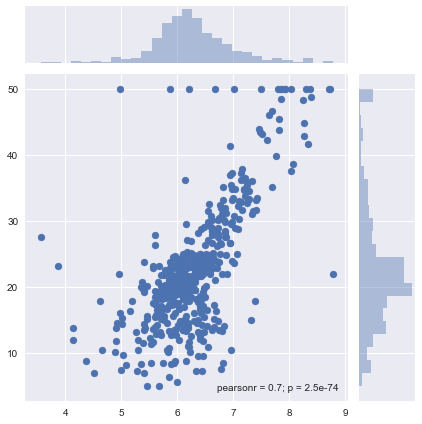

In [13]:
#
sns.jointplot(df.RM.values,target)

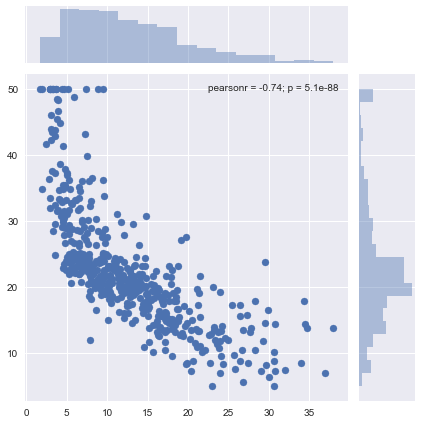

In [14]:
sns.jointplot(df.LSTAT.values,target)

**Below we fit a linear regression model predicting `MEDV` (the target vector) from `RM`.**

> **Note:** sklearn models expect the predictor matrix to be 2D and the target to be 1D.

In [6]:
# lm = linear_model.LinearRegression()

# X = df[["RM"]]
# y = target 

# model = lm.fit(X, y)

**Make predictions for the X matrix using `.predict(X)`, and score the model ($R^2$) using `model.score(X, y)`.**

Plot the predicted values against the true values of the target, and print the model $R^2$.

> **`.score(predictors, target)`**: a class method / function that returns the coefficient of determination R^2 of the prediction (for regression models).  Found in many models in scikit-learn (but not all).

In [7]:
#

**What can this plot tell us about the model?**

In [8]:
#

<a id='model-attributes'></a>

## sklearn model class attributes

---

After you run `.fit()`, a sklearn model object often contains a variety of calculated metrics, coefficients, and other information. Which metrics and attributes are present will depend on the model – consult the documentation for specifics. 

Attributes in the `LinearRegression` object include:
- **`.coef_`**: property containing the coeffients for the predictor variables
- **`.intercept_`**: value of the intercept

**Print out the beta coefficient and intercept for the model.**


In [9]:
#

**What does the coefficient mean in the context of your model?**

In [10]:
#

<a id='common-metrics'></a>

## Review: common metrics for evaluating regression models

---

The [root mean squared error (RMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation) is a standard measure of model performance. It is the square root of the mean of the sum of squared residuals:

### $$ \operatorname{RMSE}= \sqrt{\frac{1}{n}\sum_{i=1}^n(\hat{y_i} - y_i)^2} $$

The smaller the root mean squared error, the better your model fits the data. 

You are already familiar with the [coefficient of determination $R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination):

### $$ R^2 = 1 - \frac{SS_{reg}}{SS_{tot}} $$

Where the regression sum of squares is the sum of squared residuals for our model:

$SS_{reg}=\sum_i (\hat{y} -\bar{y})^2$

And the total sum of squares is the sum of squared residuals for the *baseline* model. This is essentially the variance of our target.

$SS_{tot} = \sum_i (y_i-\bar{y})^2$

$R^2$ is the most common metric to evaluate a regression and is the default scoring measure in sklearn. When we cover classification models, the `.score` function instead defaults to accuracy.


**Calculate the RMSE of your model by leveraging `sklearn.metrics.mean_squared_error`.**

In [11]:
#

<a id='mlr-sklearn'></a>

## Fit a MLR using sklearn

---

We have fit a simple linear regression predicting `MEDV ~ RM + 1` (where the 1 represents the intercept). Use the same sklearn process and `LinearRegression` model to estimate the target with both `RM` and `LSTAT`.

**Print out the coefficients from this MLR model and interpret them.**

In [12]:
#

<a id='negative-r2'></a>

## A note on negative $R^2$ values

---

Over the course of this class you will encounter negative $R^2$ values. This may seem impossible, and it is in the standard scenario where we are calculating the $R^2$ score on the data we fit the model with.

However, if you fit your model on one sample of data, *then score the model on new data not used to fit the model*, it is possible to end up with negative $R^2$.

**What does it mean to have a negative $R^2$?**

Remember that $R^2$ is 1 minus the error of your regression model divided by the error of the baseline model. A negative $R^2$ means that the regression model is performing *worse* than the baseline model. In the context of fitting our data on one sample of data and scoring on another sample, this means that we would have been better off making predictions on the test sample just using the mean of the target variable in our training set.

We will return to the topic of negative $R^2$ when we talk about training and testing sets and cross-validation.

<a id='statsmodels-intro'></a>

## Fitting a linear regression using `statsmodels`

---

Now we will fit the linear regression model predicting the target from `RM` and `LSTAT`, but this time using `statsmodels`.

The format looks like:

```python
import statsmodels.api as sm

X = df[["RM","LSTAT"]].values
# manually add the intercept column:
X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y = target

model = sm.OLS(y, X)
model = model.fit()
predictions = model.predict()
```

First we load the statsmodels api module, which contains the ordinary least squares `OLS` model class. The statsmodels process is slightly different:
- We manually make a new column for the intercept in our design matrix $X$.
- The $y$ target variable comes before the $X$ predictor
- The data is provided during the instantiation of the model object, then fit is called without the data.

**Fit the model using statsmodels.**

In [13]:
#

<a id='statsmodels-summary'></a>

### Statsmodels `.summary()`  function

Once a model is fit with statsmodels, you can print out a variety of summary statistics, metrics, and properties of the model using the `model.summary()` function.

You are already familiar with some of the information available in the summary:
- R-squared
- Number of observations
- Coefficients for the variables and the intercept (const)
- Standard errors of the coefficients, t-statistics, p-values, and confidence intervals

There is also a variety of different metrics that we have not yet talked about. Don't hesitate to look up any of the statistics online if you are curious.

In [14]:
#

<a id='independent-practice'></a>

## Independent practice

---

Using either scikit-learn or statsmodels (or both, if you prefer), build a model using any set of **continuous** variables of your choice. Evaluate your model using $R^2$. Describe what the $R^2$ means.

In [15]:
#

In [16]:
#

<a id='patsy'></a>

## A brief introduction to `patsy` formulas

---

Why slice and dice the data yourself when you just write a formula that defines your model?

The `patsy` package allows you to specify the construction of your model using a formula string, and then returns the matrices required to fit the model.

Let's say we wanted to predict `CRIM` from `TAX`, `AGE` and `ZN`. We would write a string formula like so:

```
formula = 'CRIM ~ TAX + AGE + ZN'
```

Then, after importing patsy, we can generate our target and predictor matrix by supplying the formula and the dataframe that contains the corresponding columns.

```python
import patsy

y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')
```

In [17]:
#

You'll notice that with `return_type='dataframe'` patsy's `.dmatrices()` function returns two pandas dataframes, one for the target and one for the design matrix. 

You'll also notice that it creates an intercept column by default. **If you do not want it to create an intercept column, add a -1 to the formula string**

In [18]:
# formula = 'CRIM ~ TAX + AGE + ZN -1'


You can then feed in these matrices into statsmodels or sklearn. It is generally a good practice to convert your target matrix into a 1D vector, especially when using sklearn.

> **Tip:** The `.ravel()` function for numpy arrays will "unravel" a multidimensional matrix into a one dimensional vector of values.

In [19]:
# 